<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/titanic_decisiontreeclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Working on Titanic dataset to check how many members survived.

In [ ]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df=df[["survived","pclass","sex","age","fare","embarked"]]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

/tmp/ipython-input-3731520689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
/tmp/ipython-input-3731520689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df.shape

(891, 6)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['embarked']=le.fit_transform(df['embarked'])
# sex,embarked -categorical columns
df

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2
887,1,1,0,19.0,30.0000,2
888,0,3,0,28.0,23.4500,2
889,1,1,1,26.0,30.0000,0


In [ ]:
df.embarked.value_counts()

,count
embarked,
2,646
0,168
1,77


In [ ]:
x=df.drop("survived",axis=1)
y=df["survived"]
x.head(),y.head()

(   pclass  sex   age     fare  embarked
 0       3    1  22.0   7.2500         2
 1       1    0  38.0  71.2833         0
 2       3    0  26.0   7.9250         2
 3       1    0  35.0  53.1000         2
 4       3    1  35.0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)
model.fit(x,y)


DecisionTreeClassifier(max_depth=4, random_state=42)

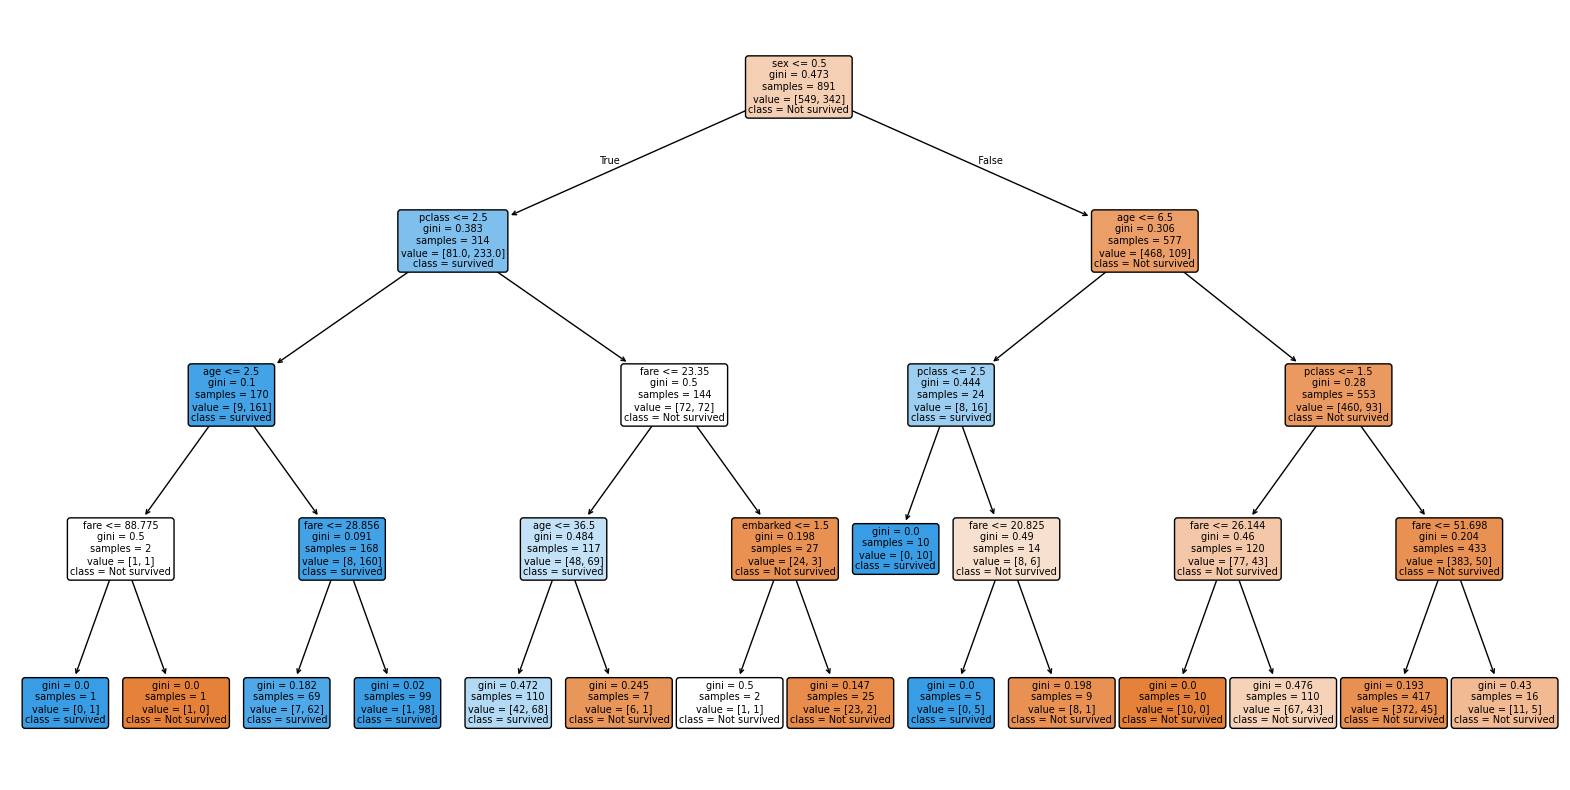

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["Not survived","survived"],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
new_passenger=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
prediction=model.predict(new_passenger)
prediction

array([0])

In [ ]:
if(prediction[0]==1):
  print("Passenger is likely to survive")
else:
  print("Passenger is not likely to survive")

Passenger is not likely to survive
